<a href="https://colab.research.google.com/github/yanghyeon408/Dacon/blob/master/DNN_4th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('201901-202003.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [ ]:
# 데이터 정제
data = df.copy()
df = data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'FLC', 'CSTMR_CNT', 'CNT'], axis=1)

In [ ]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [ ]:
# 날짜 처리

df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))
df = df.drop(['REG_YYMM'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   CARD_SIDO_NM  object
 1   STD_CLSS_NM   object
 2   HOM_SIDO_NM   object
 3   AGE           object
 4   SEX_CTGO_CD   int64 
 5   AMT           int64 
 6   year          int64 
 7   month         int64 
dtypes: int64(4), object(4)
memory usage: 1.5+ GB


In [ ]:
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)

In [ ]:
df.shape

(762702, 8)

In [ ]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [ ]:
df = df_num[['year', 'month', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'AMT']]

In [ ]:
df.head()

,year,month,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,AMT
0,2019,1,0,0,0,1,1,311200
1,2019,2,0,0,0,1,1,605000
2,2019,6,0,0,0,1,1,139000
3,2019,8,0,0,0,1,1,27500
4,2019,9,0,0,0,1,1,395500


In [ ]:
df.shape

(762702, 8)

In [ ]:
df.tail()

,year,month,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,AMT
762697,2019,3,16,40,16,6,2,148000
762698,2019,5,16,40,16,6,2,329800
762699,2019,10,16,40,16,6,2,557800
762700,2019,12,16,40,16,6,2,247800
762701,2020,1,16,40,16,6,2,230400


In [ ]:
# 카테고리 변수 원-핫-인코딩
category = ['year','month','CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD']
dummy = pd.get_dummies(df, columns=category)
dummy.head()
dummy.to_csv("4th_DNN.csv", index=False, encoding="utf-8-sig")
del dummy

In [ ]:
df = pd.read_csv('4th_DNN.csv')

In [ ]:
df.shape

(762702, 99)

In [ ]:
df.head()

,AMT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,HOM_SIDO_NM_16,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,SEX_CTGO_CD_1,SEX_CTGO_CD_2
0,311200,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,605000,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,139000,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27500,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,395500,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# train 이랑 test 나누기
df_train = df.drop(df.loc[(df['year_2020'] == 1) & (df['month_3'] == 1)].index)

In [ ]:
df_test = df.loc[(df['year_2020'] == 1) & (df['month_3'] == 1)]

In [ ]:
df_train.shape, df_test.shape

((723118, 99), (39584, 99))

In [ ]:
df_train.head()

,AMT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,HOM_SIDO_NM_16,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,SEX_CTGO_CD_1,SEX_CTGO_CD_2
0,311200,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,605000,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,139000,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27500,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,395500,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_test.head()

,AMT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,HOM_SIDO_NM_16,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,SEX_CTGO_CD_1,SEX_CTGO_CD_2
7,427510,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34,5622890,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
49,2296125,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
64,8360300,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
79,5809250,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df_train = df_train.reset_index(drop=True)

In [ ]:
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test.head()

,AMT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,HOM_SIDO_NM_16,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,SEX_CTGO_CD_1,SEX_CTGO_CD_2
0,427510,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5622890,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2296125,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,8360300,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5809250,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
train_data = df_train.drop(['AMT'], axis=1)
train_targets = df_train['AMT']

In [ ]:
train_targets

0         311200
1         605000
2         139000
3          27500
4         395500
           ...  
723113    148000
723114    329800
723115    557800
723116    247800
723117    230400
Name: AMT, Length: 723118, dtype: int64

In [ ]:
test_data = df_test.drop(['AMT'], axis=1)
test_targets = df_test['AMT']

In [ ]:
test_data.head()

,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,HOM_SIDO_NM_16,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,SEX_CTGO_CD_1,SEX_CTGO_CD_2
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
train_data.shape, test_data.shape

((723118, 98), (39584, 98))

In [ ]:

y_train = np.asarray(train_targets).astype('float32')
y_test = np.asarray(test_targets).astype('float32')

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
original_model.add(layers.Dense(64, activation='relu'))
original_model.add(layers.Dense(64, activation='relu'))
original_model.add(layers.Dense(1))

original_model.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])

In [ ]:
original_hist = original_model.fit(train_data, y_train,
                                   epochs=100,
                                   batch_size=128,
                                   validation_data=(test_data, y_test))

Epoch 1/100
5650/5650 [==============================] - 5s 802us/step - loss: 391135868418523136.0000 - mae: 96288896.0000 - val_loss: 396569276925870080.0000 - val_mae: 129584976.0000
Epoch 2/100
5650/5650 [==============================] - 4s 793us/step - loss: 381704944870227968.0000 - mae: 126874760.0000 - val_loss: 386650651251179520.0000 - val_mae: 123871504.0000
Epoch 3/100
5650/5650 [==============================] - 5s 799us/step - loss: 370442853425348608.0000 - mae: 118092000.0000 - val_loss: 375137768075952128.0000 - val_mae: 114296648.0000
Epoch 4/100
5650/5650 [==============================] - 4s 793us/step - loss: 359099226321321984.0000 - mae: 107960088.0000 - val_loss: 364214738529288192.0000 - val_mae: 104664752.0000
Epoch 5/100
5650/5650 [==============================] - 4s 789us/step - loss: 347533875825606656.0000 - mae: 100491608.0000 - val_loss: 352700618403479552.0000 - val_mae: 99172632.0000
Epoch 6/100
5650/5650 [==============================] - 4s 795us/s

5650/5650 [==============================] - 4s 790us/step - loss: 97192137791111168.0000 - mae: 75190520.0000 - val_loss: 104681684582006784.0000 - val_mae: 79038808.0000
Epoch 46/100
5650/5650 [==============================] - 4s 789us/step - loss: 94643323809038336.0000 - mae: 74524352.0000 - val_loss: 102734131661635584.0000 - val_mae: 78918128.0000
Epoch 47/100
5650/5650 [==============================] - 4s 790us/step - loss: 92020816778100736.0000 - mae: 73714696.0000 - val_loss: 101265347335684096.0000 - val_mae: 78183448.0000
Epoch 48/100
5650/5650 [==============================] - 4s 790us/step - loss: 90057647356641280.0000 - mae: 72918984.0000 - val_loss: 99784837749014528.0000 - val_mae: 78022528.0000
Epoch 49/100
5650/5650 [==============================] - 5s 801us/step - loss: 88000452511137792.0000 - mae: 72275384.0000 - val_loss: 98683805702815744.0000 - val_mae: 77603688.0000
Epoch 50/100
5650/5650 [==============================] - 5s 799us/step - loss: 8623280718

5650/5650 [==============================] - 5s 799us/step - loss: 61216117330280448.0000 - mae: 60203764.0000 - val_loss: 79156599452598272.0000 - val_mae: 68949352.0000
Epoch 90/100
5650/5650 [==============================] - 4s 796us/step - loss: 60717896828977152.0000 - mae: 60012536.0000 - val_loss: 79660081288839168.0000 - val_mae: 69278512.0000
Epoch 91/100
5650/5650 [==============================] - 5s 797us/step - loss: 60399596802670592.0000 - mae: 59865028.0000 - val_loss: 78745906089820160.0000 - val_mae: 68969504.0000
Epoch 92/100
5650/5650 [==============================] - 4s 788us/step - loss: 59938523473510400.0000 - mae: 59705624.0000 - val_loss: 78650351657418752.0000 - val_mae: 68850760.0000
Epoch 93/100
5650/5650 [==============================] - 4s 794us/step - loss: 59562052410146816.0000 - mae: 59471780.0000 - val_loss: 77884954125533184.0000 - val_mae: 68617584.0000
Epoch 94/100
5650/5650 [==============================] - 4s 795us/step - loss: 5917330203528

In [ ]:
epochs = range(1, 101)
original_val_loss = original_hist.history['val_loss']

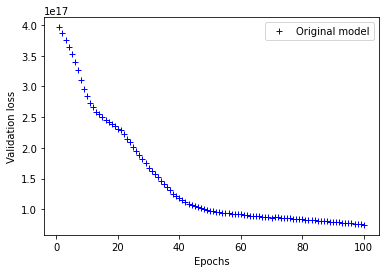

In [ ]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
original_model.save('4th_model.h5')

In [ ]:
example_batch = train_data[:10]
example_result = original_model.predict(example_batch)
example_result

array([[28865344.],
       [28865344.],
       [28865344.],
       [28865344.],
       [28865344.],
       [28865344.],
       [28865344.],
       [28865344.],
       [28865344.],
       [28865344.]], dtype=float32)